In [1]:
import pandas as pd

# Missing Values (NaN → Not a Number)

In [2]:
Gapminder = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/Life Expectancy vs GDP 1950-2018.csv")
Gapminder = Gapminder[Gapminder["Year"] == 1950]  # just for making it smaller :)
Gapminder

,Country,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,Afghanistan,1950,27.638,1156.0,7752117.0,Asia
70,Albania,1950,54.191,1596.0,1263164.0,Europe
140,Algeria,1950,42.087,2176.0,8872250.0,Africa
210,American Samoa,1950,63.775,NaN,18941.0,Oceania
280,Andorra,1950,62.151,NaN,6198.0,Europe
...,...,...,...,...,...,...
16103,Wallis and Futuna,1950,51.092,NaN,6994.0,Oceania
16173,Western Sahara,1950,34.753,NaN,13763.0,Africa
16243,Yemen,1950,29.097,1452.0,4661279.0,Asia
16313,Zambia,1950,42.306,1054.0,2310436.0,Africa


### Detecting Missing Values

In [3]:
# isna() returns a Boolean DataFrame 
Gapminder.isna()

,Country,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,False,False,False,False,False,False
70,False,False,False,False,False,False
140,False,False,False,False,False,False
210,False,False,False,True,False,False
280,False,False,False,True,False,False
...,...,...,...,...,...,...
16103,False,False,False,True,False,False
16173,False,False,False,True,False,False
16243,False,False,False,False,False,False
16313,False,False,False,False,False,False


In [4]:
# Remember that you can use summary statistic methods on DataFrames 
Gapminder.isna().any() # shows whether any value in each column is missing or not
# Both .isna() and .isnull() serve the same purpose and are functionally identical

Country                              False
Year                                 False
Life expectancy                      False
GDP per capita                        True
Population (historical estimates)    False
Continent                            False
dtype: bool

### Counting missing values

Country                               0
Year                                  0
Life expectancy                       0
GDP per capita                       93
Population (historical estimates)     0
Continent                             0
dtype: int64
Country                              0.000000
Year                                 0.000000
Life expectancy                      0.000000
GDP per capita                       0.395745
Population (historical estimates)    0.000000
Continent                            0.000000
dtype: float64


<Axes: >

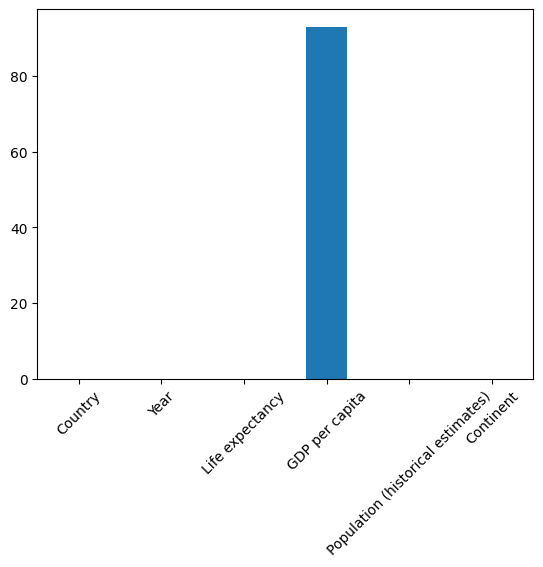

In [5]:
print(Gapminder.isna().sum())

# proportions
print(Gapminder.isna().sum() / Gapminder.shape[0])

# plotting missing values (Note that 'Gapminder.isna().sum()' is a Series)
Gapminder.isna().sum().plot(kind="bar", rot=45)

### Removing Missing Values
One option is to remove the rows in the DataFrame that contain missing values. This can be done using the `dropna` method. However, this may not be ideal if you have a lot of missing data, since that means losing a lot of observations.

→ This can be a convenient solution if missing values are 5% or less of the whole data

In [6]:
# Gapminder.dropna() # drops all the missing values

threshold = len(Gapminder) * 0.05

# We can use Boolean indexing to filter for columns with missing values less than or equal to this threshold
cols_to_drop =  Gapminder.columns[Gapminder.isna().sum() <= threshold]
print(cols_to_drop)
Gapminder.dropna(subset=cols_to_drop, inplace=True) # drops all rows with NaN values in the specified columns only

# df.dropna(how='any')  # Drops rows where any column is NaN (the default behavior)
# df.dropna(how='all')  # Drops rows where all columns are NaN 

Index(['Country', 'Year', 'Life expectancy',
       'Population (historical estimates)', 'Continent'],
      dtype='object')


### Replacing missing values
Another option is to replace missing values with another value. The `fillna` method takes a value, and all NaNs will be replaced with this value. 

**N.B.** There are also many sophisticated techniques for replacing missing values:
-    Impute mean, median, or mode (replacing missing values by the mean, median, or mode)
	-   Depends on the context and the distribution
-   Impute by sub-group
	-   For example, divide your data into categories first, and then use the **Impute mean, median, mode** method for each group

In [7]:
# Gapminder.fillna(0) # Fill all missings with zero → Baaad!

# We then filter for the remaining columns with missing values. Those columns have missing values more than 5% of the whole data
cols_with_missings = Gapminder.columns[Gapminder.isna().sum() > 0] # OR [Gapminder.isna().sum() > threshold]
print(cols_with_missings)
for col in cols_with_missings:    
	pass
	# You may use this for categorical data: Gapminder[col].fillna(Gapminder[col].mode()[0], inplace=True)
# You may also use this line if you want to include Nan values in your DataFrame as meaningful values: df.loc[df[col].isna(), col] = "Other"

# We'll impute median GDP per capita by continent, and then calculate the median for each continent (sub-group)
# Someone else may prefer to group by country → this can be suitable if you have many observations for each country over a long period
GDP_per_capita_dict = Gapminder.groupby("Continent")["GDP per capita"].median().to_dict()	
print(GDP_per_capita_dict)
# `.map(GDP_per_capita_dict)` maps each value in the "Continent" column to its corresponding median GDP per capita value from `GDP_per_capita_dict`.
Gapminder["GDP per capita"] = Gapminder["GDP per capita"].fillna(Gapminder["Continent"].map(GDP_per_capita_dict))

Gapminder

Index(['GDP per capita'], dtype='object')
{'Africa': 1070.0, 'Asia': 1627.5, 'Europe': 5907.0, 'North America': 2607.5, 'Oceania': 12647.0, 'South America': 3555.5}


,Country,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,Afghanistan,1950,27.638,1156.0,7752117.0,Asia
70,Albania,1950,54.191,1596.0,1263164.0,Europe
140,Algeria,1950,42.087,2176.0,8872250.0,Africa
210,American Samoa,1950,63.775,12647.0,18941.0,Oceania
280,Andorra,1950,62.151,5907.0,6198.0,Europe
...,...,...,...,...,...,...
16103,Wallis and Futuna,1950,51.092,12647.0,6994.0,Oceania
16173,Western Sahara,1950,34.753,1070.0,13763.0,Africa
16243,Yemen,1950,29.097,1452.0,4661279.0,Asia
16313,Zambia,1950,42.306,1054.0,2310436.0,Africa


# Completeness 

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

### Missingness Types

-	**Missing Completely at Random (MCAR):** No systematic relationship between missing data and other values

	-	e.g., Data entry errors when inputting data

-	**Missing at Random (MAR):** Systematic relationship between missing data and other <u>**observed**</u> values

	-	e.g., Missing ozone data for high temperatures

-	**Missing Not at Random (MNAR):** Systematic relationship between missing data and <u>**unobserved**</u> values

	-	e.g., when it's really hot outside, the thermometer might stop working, so we don't have temperature measurements for days with high temperatures. However, we have no way to tell this just from looking at the data since we can't actually see what the missing temperatures are.
	
	-	e.g., A customer `satisfaction_score` column with missing values for highly dissatisfied customers.

<br>

**Code Example:**

```python
# The `missingno` package allows to create useful visualizations of our missing data.
import missingno as msno

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
complete_investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values("Age")
msno.matrix(banking_sorted)
plt.show()
```
<br>

**Output:**

```bash
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64
```

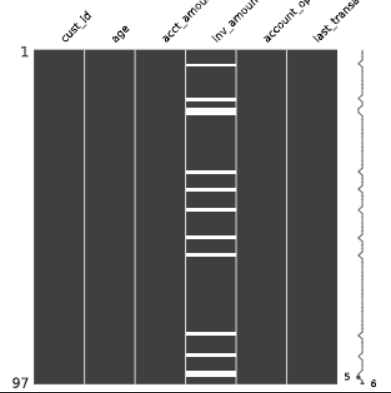

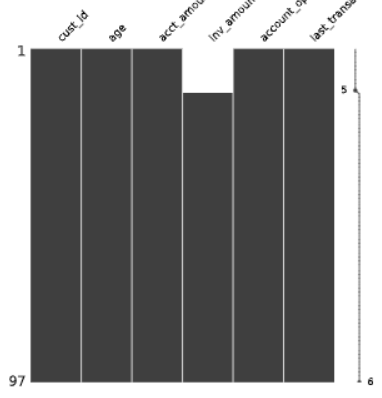

<br>

**Note:** Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to `0` with `.fillna()`.